In [1]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

from exo_finder.training.base.model_io import get_checkpoint_path
from exo_finder.training.clean_transit_prediction.main import CHECKPOINT_PATH
from exo_finder.training.clean_transit_prediction.transit_segmentation_model import CleanSegmentationModel
from exo_finder.training.data_loading.lightcurve_dataset import LcDataModule

In [2]:
checkpoint_path = get_checkpoint_path(base_path=CHECKPOINT_PATH, version=3)
dataloader = LcDataModule(batch_size=10).setup().predict_dataloader()
model: CleanSegmentationModel = CleanSegmentationModel.load_from_checkpoint(checkpoint_path).to("cpu")

  0%|          | 0/656 [00:00<?, ?it/s]

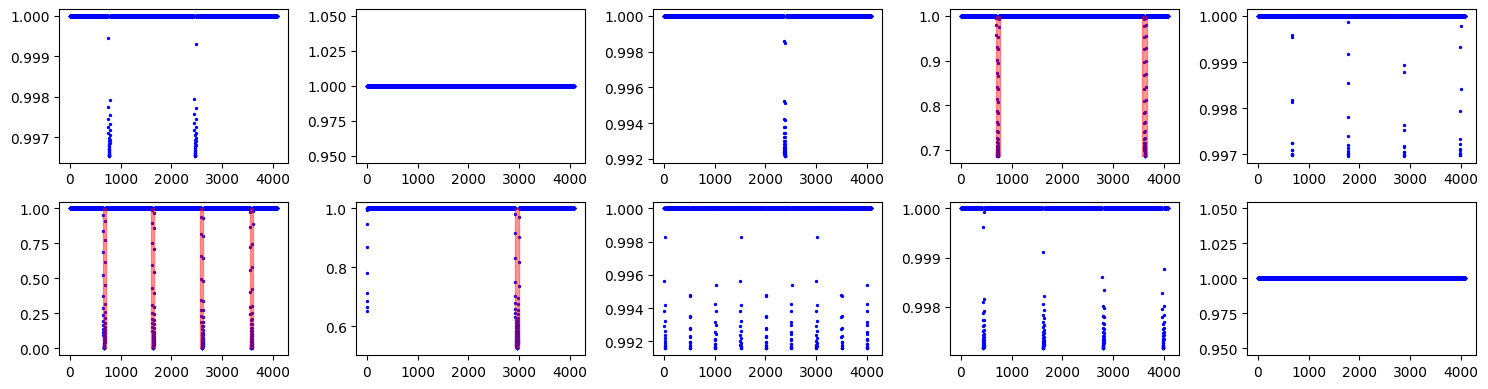

  0%|          | 1/656 [00:00<04:02,  2.70it/s]

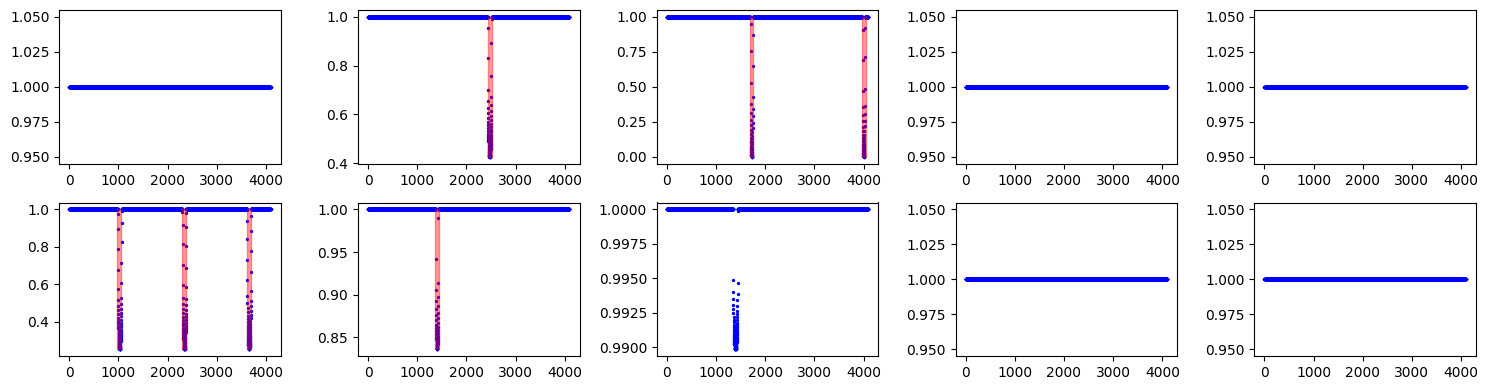

  0%|          | 2/656 [00:00<04:31,  2.41it/s]

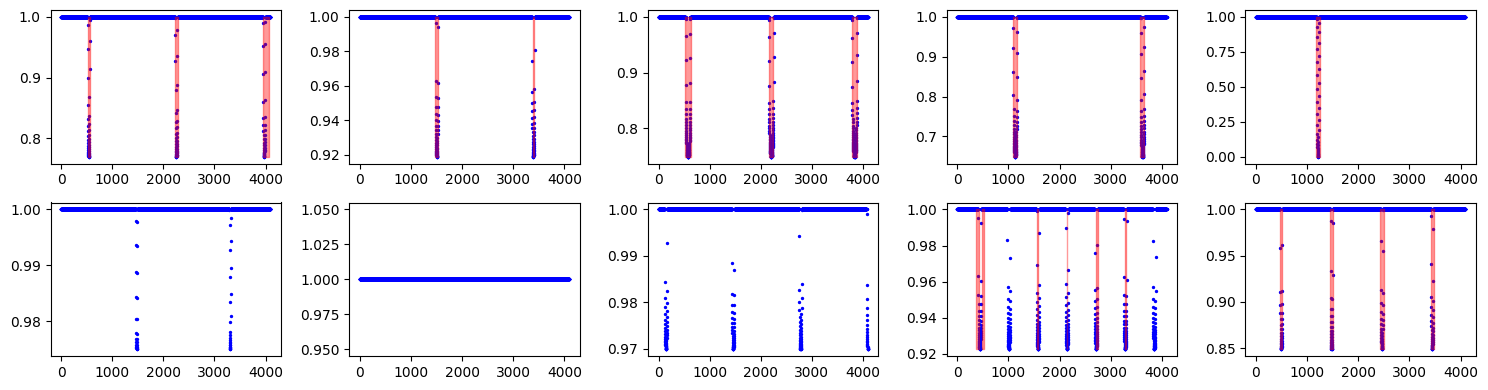

  0%|          | 3/656 [00:01<04:05,  2.66it/s]

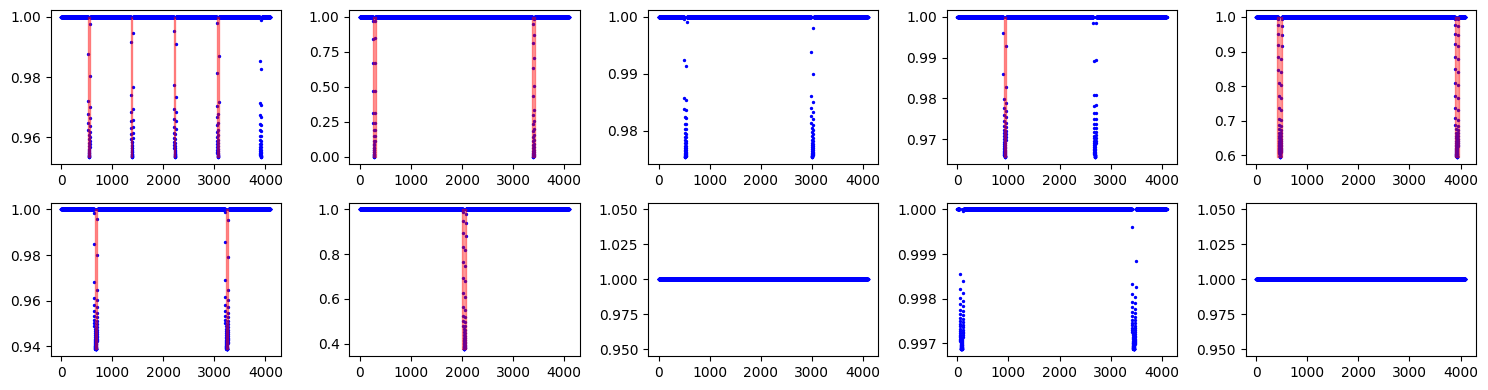

  1%|          | 4/656 [00:01<03:56,  2.76it/s]

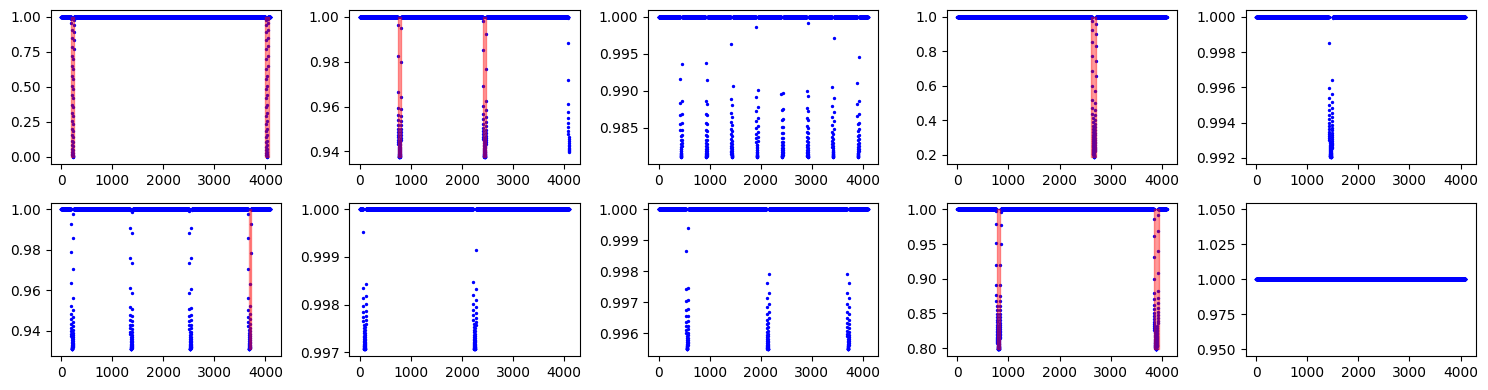

  1%|          | 5/656 [00:01<04:15,  2.55it/s]

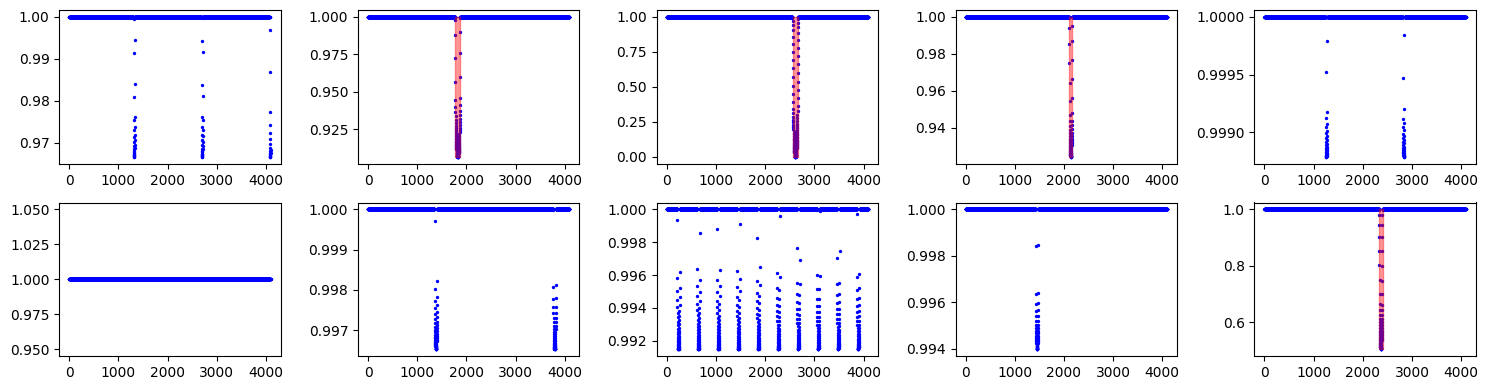

  1%|          | 6/656 [00:02<04:00,  2.70it/s]

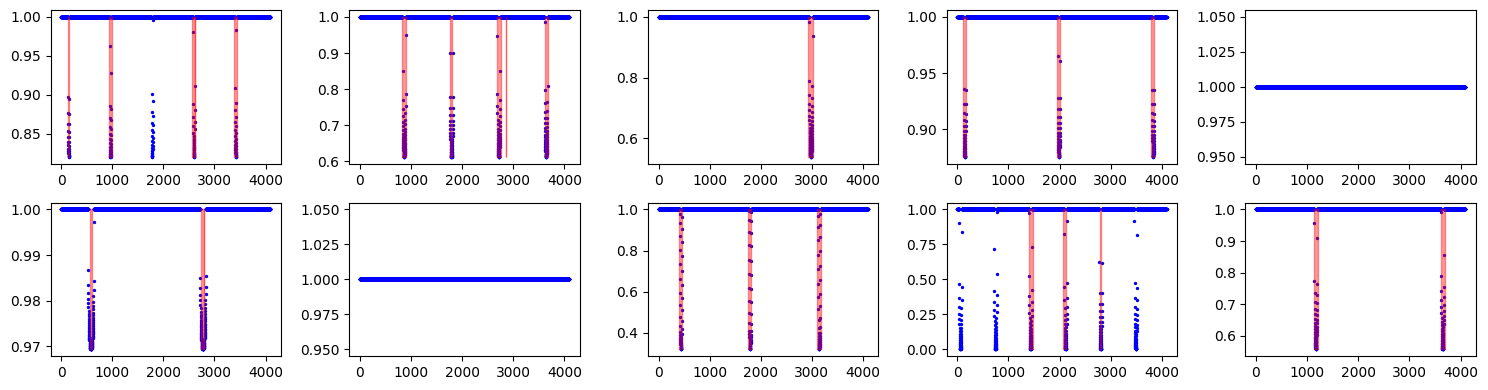

  1%|          | 7/656 [00:02<03:56,  2.74it/s]

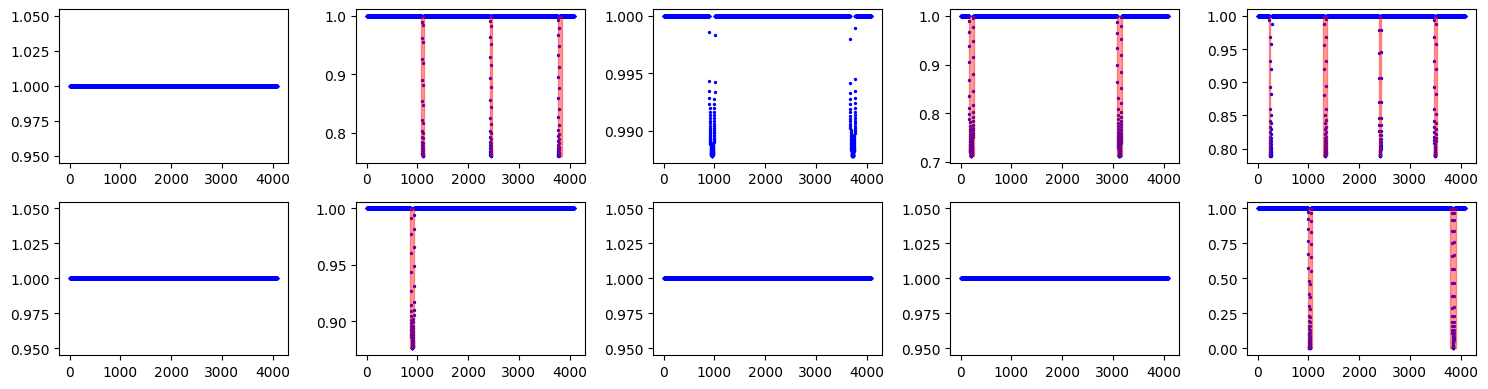

  1%|          | 8/656 [00:03<04:12,  2.57it/s]

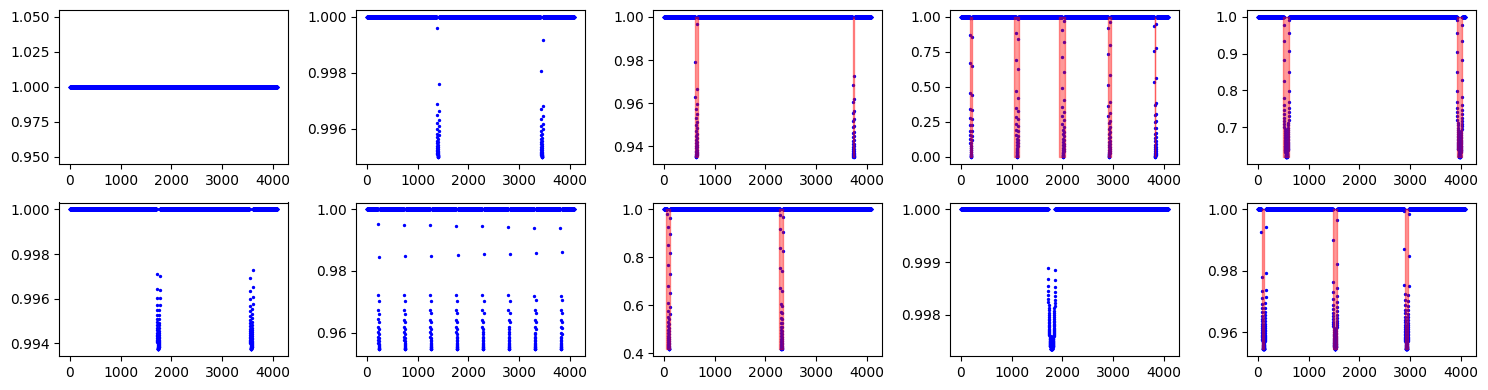

  1%|▏         | 9/656 [00:03<04:06,  2.62it/s]

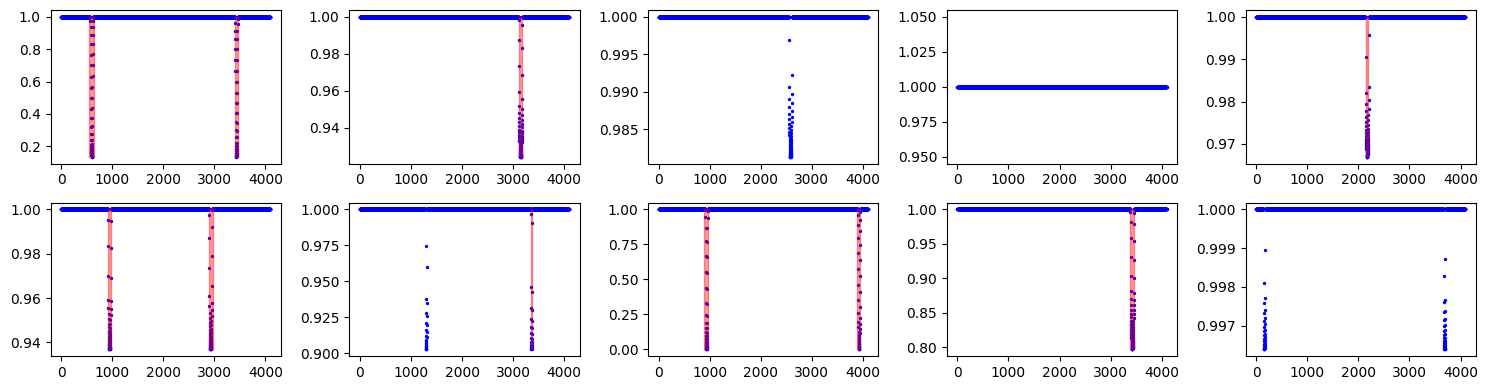

  2%|▏         | 10/656 [00:03<04:07,  2.61it/s]

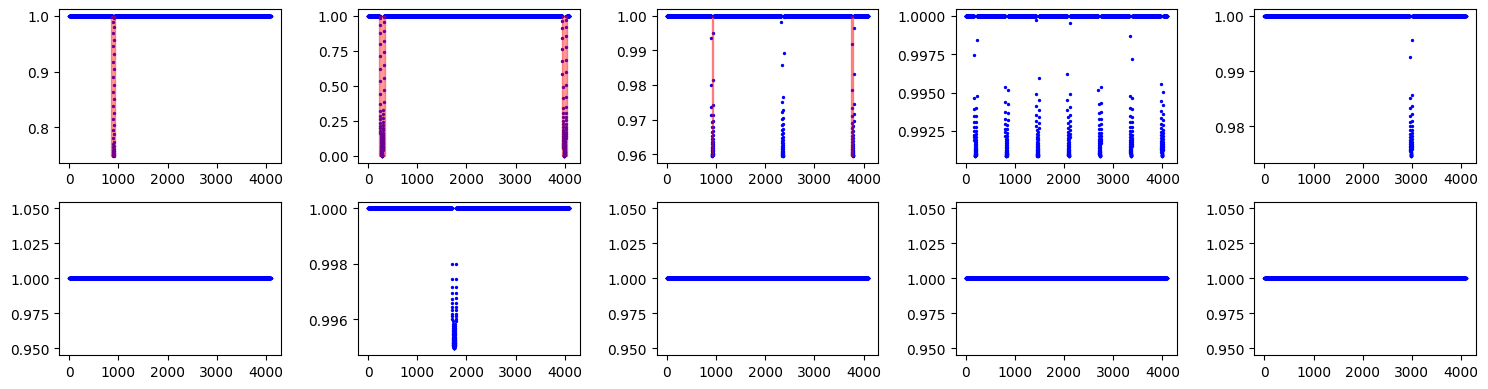

  2%|▏         | 10/656 [00:04<04:37,  2.33it/s]


In [3]:
model.eval()
with torch.no_grad():
    b=0
    t = torch.arange(0, 2 ** 12)
    for data_batch in tqdm(dataloader):
        x, _ = CleanSegmentationModel.get_xy(data_batch)
        predictions = model.predict(x)

        fig, axes = plt.subplots(2, 5, figsize=(15,4))
        for i, ax in enumerate(axes.flatten()):
            xi = x[i]
            ax.scatter(t, xi, s=2, color="blue")
            ax.fill_between(t, xi.min(), xi.max(), where=predictions[i], alpha=0.4, color="red")

        plt.tight_layout()
        plt.show()

        b += 1
        if b > 10:
            break